<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/seaborn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://seaborn.pydata.org/index.html
- https://note.com/hiro10_yme38/n/nd2fa525942f3#DbQOL

In [1]:
!pip install -U pip


     |████████████████████████████████| 1.6MB 17.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
!pip install -U numpy


     |████████████████████████████████| 15.3 MB 211 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!pip install -U scipy


     |████████████████████████████████| 27.4 MB 93 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
!pip install -U pandas


     |████████████████████████████████| 9.9 MB 14.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.4 which is incompatible.


In [5]:
!pip install -U matplotlib


     |████████████████████████████████| 10.3 MB 12.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
!pip install -U seaborn

In [7]:
import seaborn as sns
sns.__version__

'0.11.1'

In [8]:
import numpy as np
np.__version__

'1.19.5'

In [9]:
import pandas as pd
pd.__version__

'1.1.5'

In [10]:
!pip uninstall -y matplotlib

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Successfully uninstalled matplotlib-3.4.2


In [11]:
!pip install matplotlib==3.0.2

     |████████████████████████████████| 12.9 MB 53 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [12]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [13]:
import matplotlib.pyplot as plt

In [14]:
import requests
# import json
import matplotlib.dates as mdates
from matplotlib import ticker
import datetime
import time
# import re
# from pytz import timezone
from tqdm.notebook import tqdm

%matplotlib inline

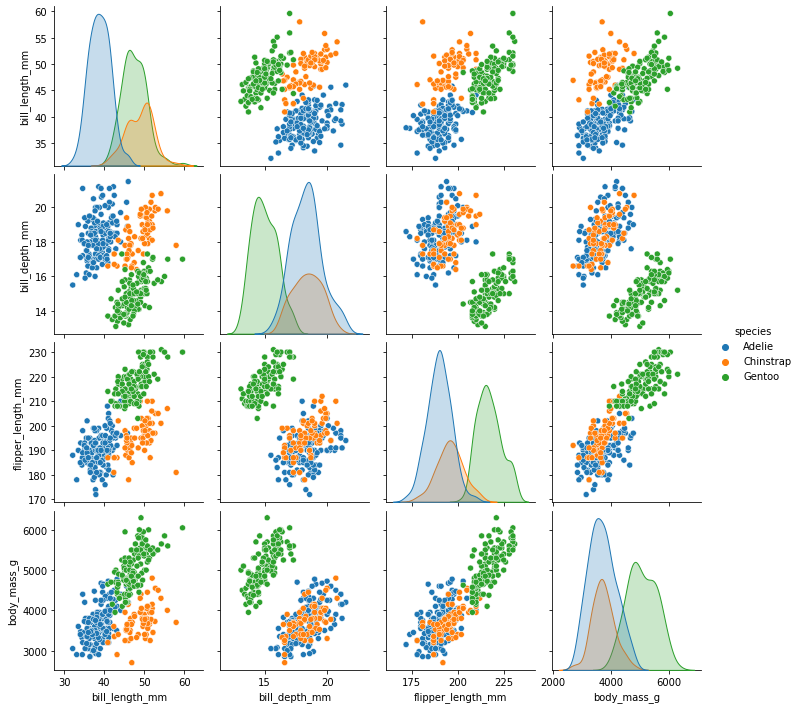

In [15]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [16]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [17]:
response = requests.get(url)
response

<Response [200]>

In [18]:
response.headers

{'Connection': 'keep-alive', 'Content-Length': '25722', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"d2eef2ac0780f792a0c597c404a7d7f1137a8e2ccb8ca47beabf3e75fecf61d0"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': '4672:73DC:2B9D53:3660CF:60AA53C4', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Sun, 23 May 2021 13:08:21 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-ams21083-AMS', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1621775301.946598,VS0,VE99', 'Vary': 'Authorization,Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': 'adbff1a2cdfa9f0b7b502f792ce720e3278fdbd0', 'Expires': 'Sun, 23 May 2021 13:13:21 GMT', 'Source-Age': '0'}

In [19]:
response.status_code

200

In [20]:
data = response.json()
data.keys()

dict_keys(['contacts', 'querents', 'patients_summary', 'inspections_summary', 'lastUpdate', 'main_summary'])

In [21]:
patients_summary = data['patients_summary']
patients_summary.keys()

dict_keys(['date', 'data'])

In [22]:
update_at = patients_summary['date']
update_at

'2021/05/23 18:00'

In [23]:
patients_summary = patients_summary['data']
patients_summary

[{'小計': 1, '日付': '2020-01-24T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-25T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-26T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-27T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-28T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-29T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-30T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-31T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-01T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-02T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-03T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-04T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-05T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-06T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-07T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-08T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-09T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-10T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-11T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-12T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-02-13T08:00:00.000Z'},
 {'小計': 2, '日付': '2020-02-14T08:00

In [24]:
df = pd.DataFrame(patients_summary)


In [25]:
# df = pd.DataFrame(patients_summary)
# df

In [26]:
df.index = pd.to_datetime(df['日付'])

In [27]:
_df = df.copy()


In [28]:
_df['date'] = _df.index
_df['cnt'] = _df['小計']


In [29]:
_df['move_ave_3'] = _df['cnt'].rolling('3D').mean()
_df['move_ave_7'] = _df['cnt'].rolling('7D').mean()
_df['move_ave_14'] = _df['cnt'].rolling('14D').mean()
_df['move_ave_21'] = _df['cnt'].rolling('21D').mean()
_df['move_ave_30'] = _df['cnt'].rolling('30D').mean()
_df['move_ave_60'] = _df['cnt'].rolling('60D').mean()
_df['move_ave_90'] = _df['cnt'].rolling('90D').mean()
_df['move_ave_120'] = _df['cnt'].rolling('120D').mean()
_df['move_ave_180'] = _df['cnt'].rolling('180D').mean()
_df['move_ave_365'] = _df['cnt'].rolling('365D').mean()


In [30]:
_df = _df.drop(['日付', '小計'], axis=1)

In [31]:
x = _df['date']
y1 = _df['cnt']

In [32]:
y2 = _df['move_ave_3']


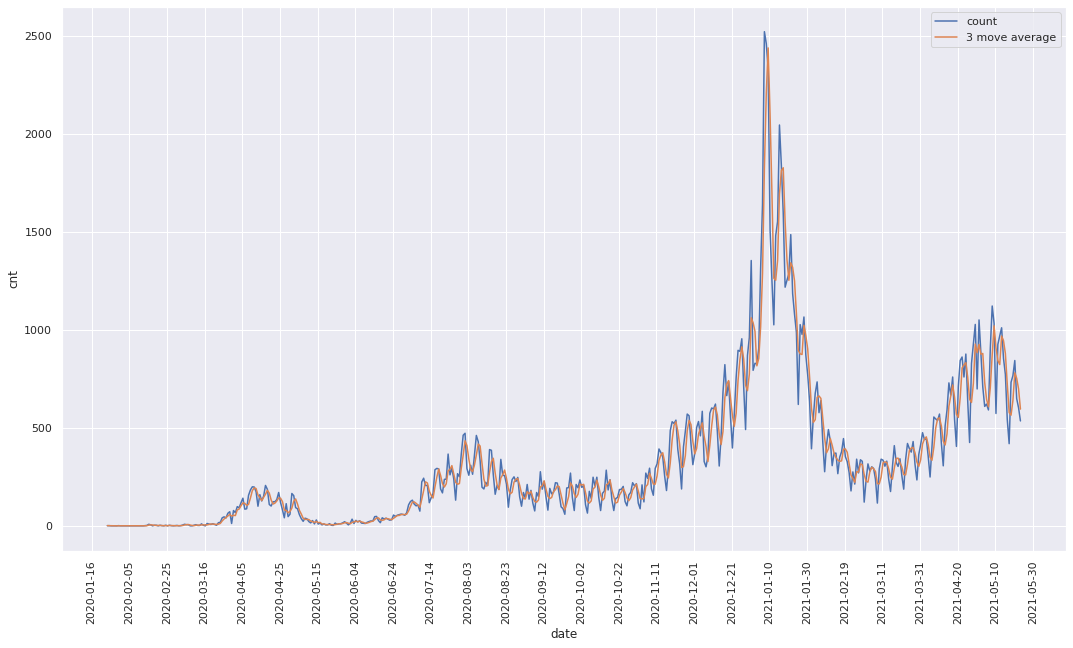

In [33]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='3 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [34]:
y2 = _df['move_ave_7']


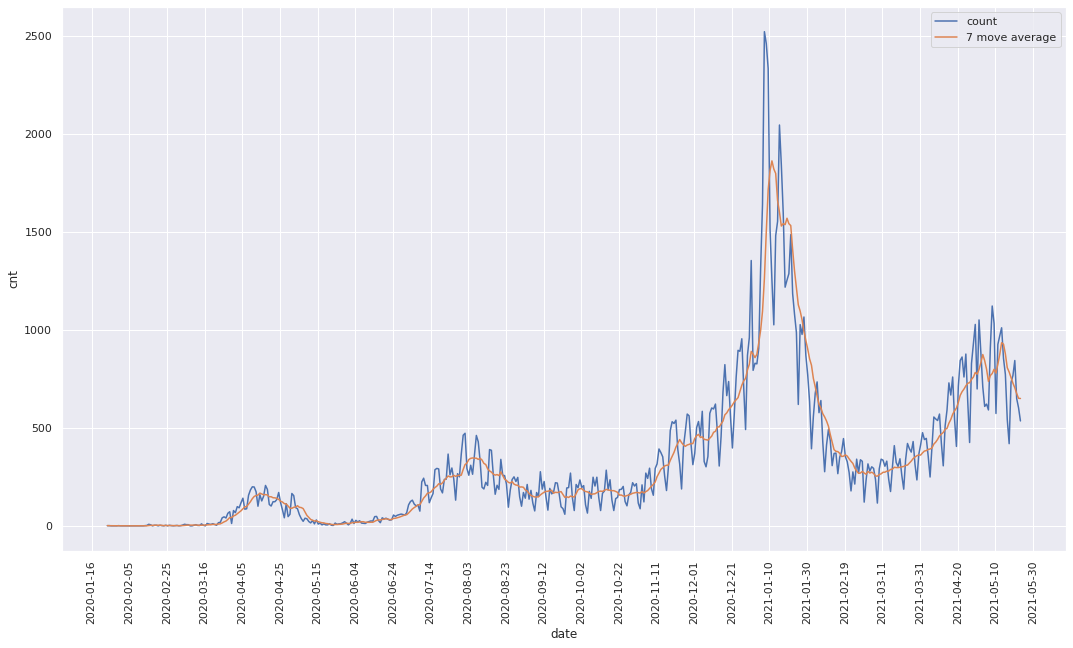

In [35]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='7 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [36]:
y2 = _df['move_ave_14']


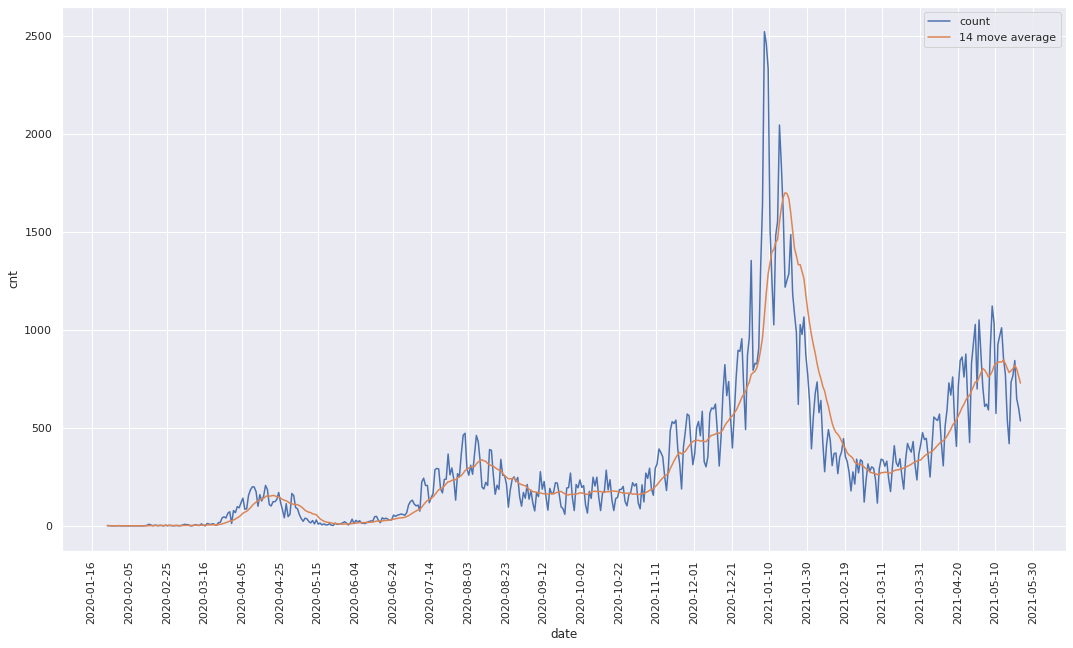

In [37]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='14 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [38]:
y2 = _df['move_ave_21']


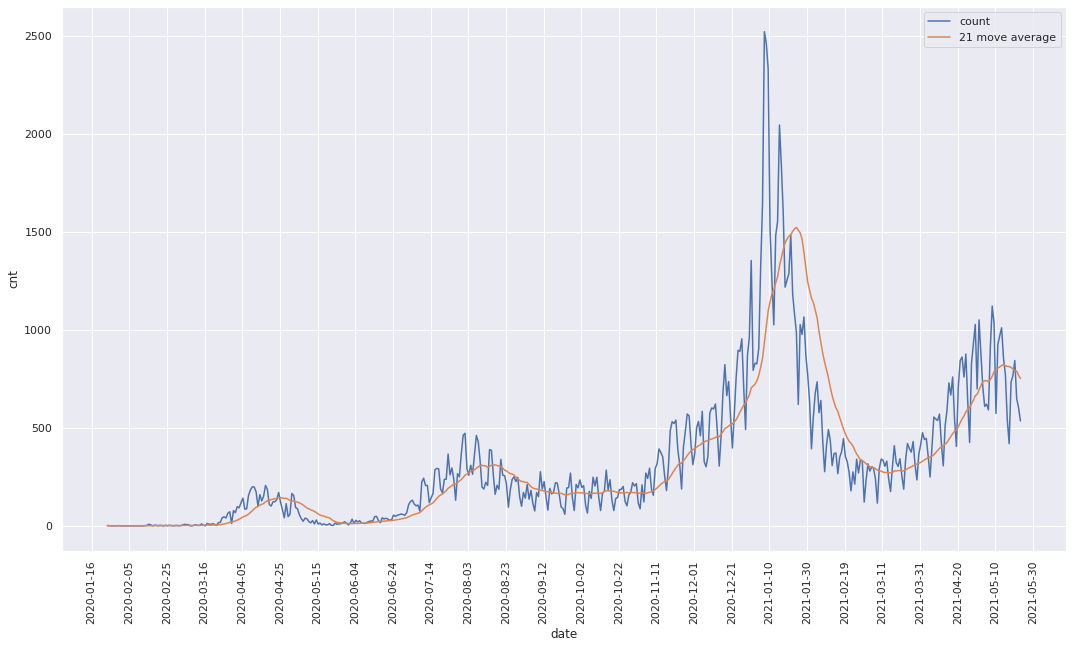

In [39]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='21 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [40]:
y2 = _df['move_ave_30']


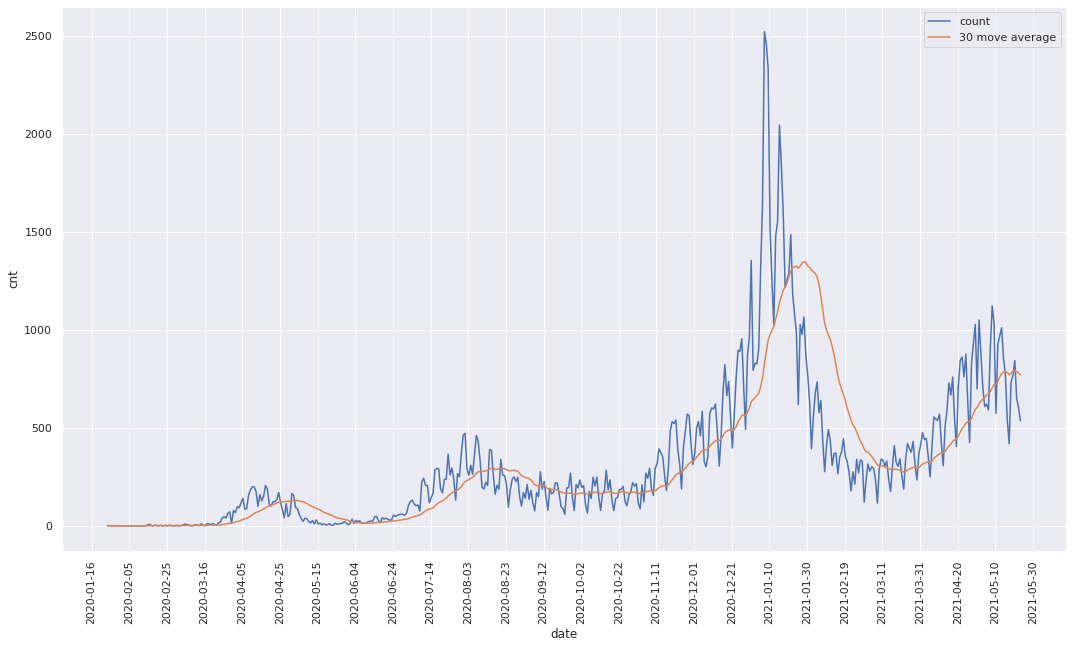

In [41]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='30 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [42]:
y2 = _df['move_ave_60']


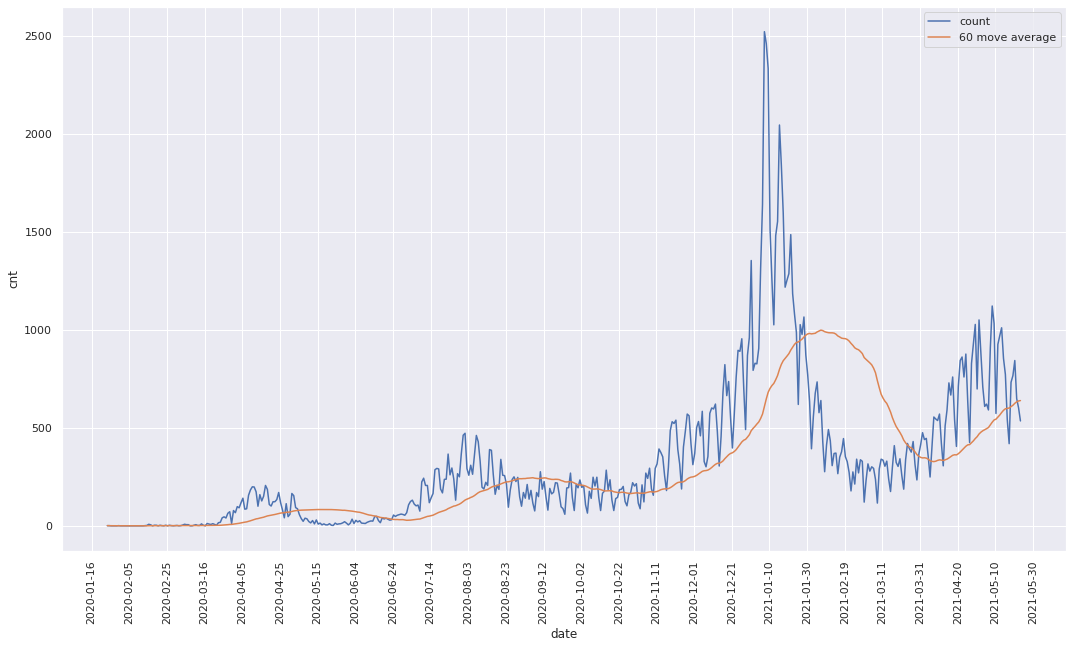

In [43]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='60 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [44]:
y2 = _df['move_ave_90']


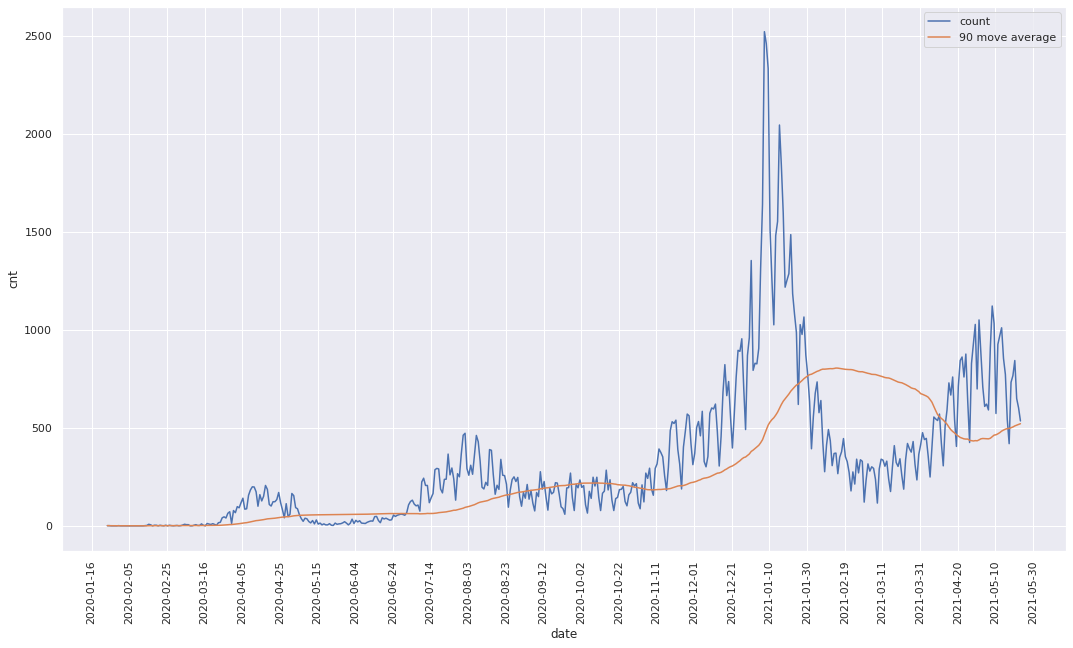

In [45]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='90 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [46]:
y2 = _df['move_ave_120']


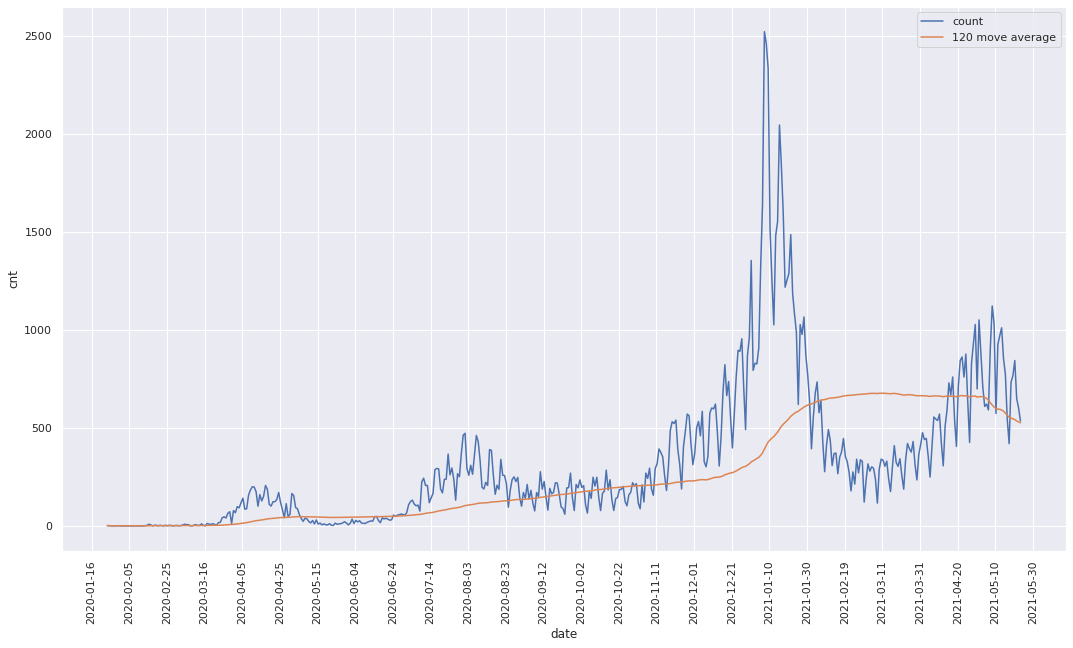

In [47]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='120 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [48]:
y2 = _df['move_ave_180']


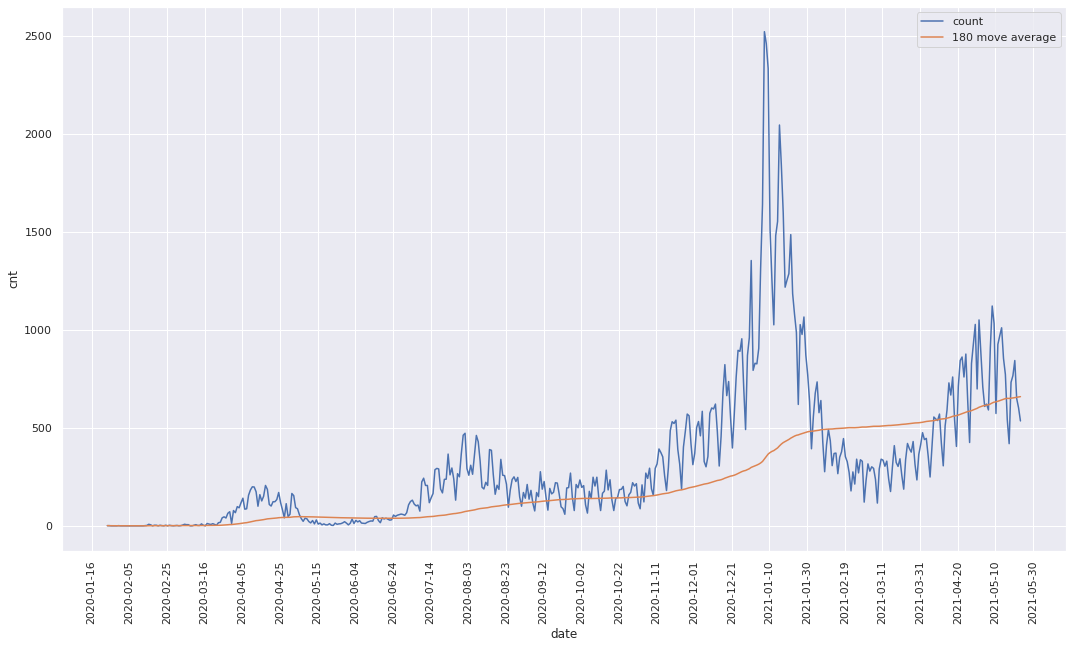

In [49]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='180 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [50]:
y2 = _df['move_ave_365']


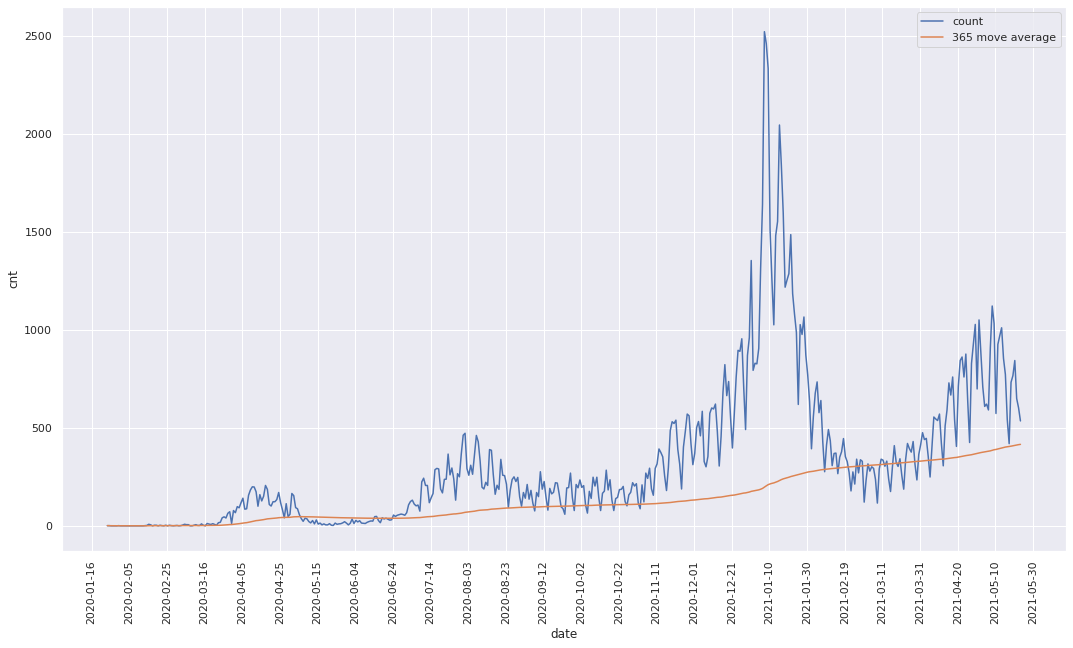

In [51]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='365 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [52]:
y1 = _df['move_ave_3']
y2 = _df['move_ave_7']
y3 = _df['move_ave_14']
y4 = _df['move_ave_21']
y5 = _df['move_ave_30']


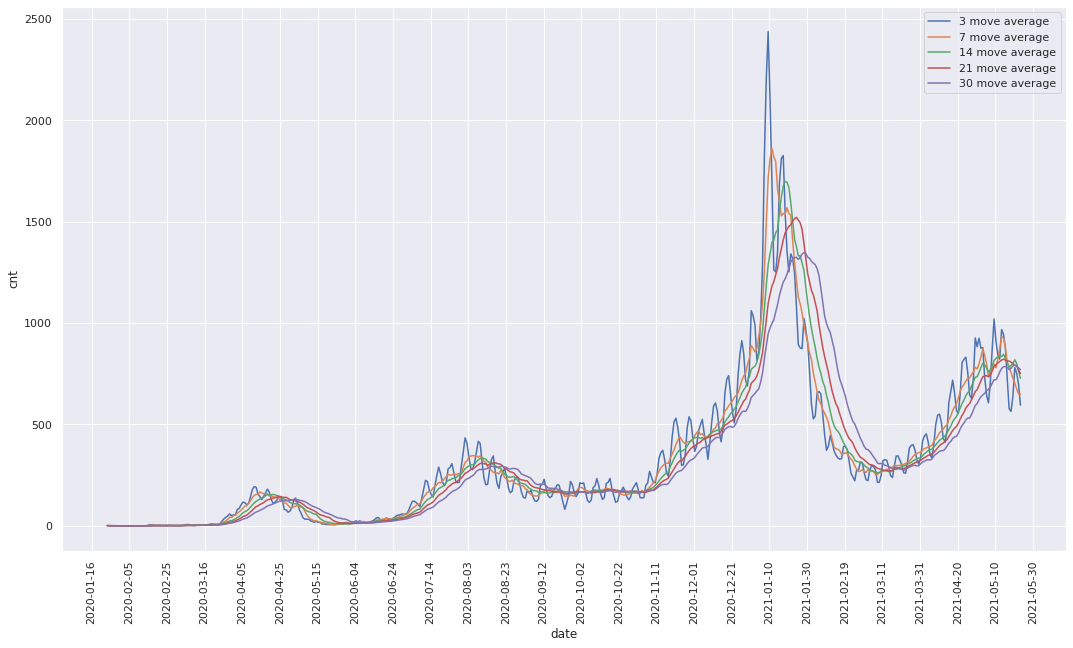

In [53]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='3 move average')
ax.plot(x, y2, label='7 move average')
ax.plot(x, y3, label='14 move average')
ax.plot(x, y4, label='21 move average')
ax.plot(x, y5, label='30 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [54]:
y11 = _df['move_ave_60']
y12 = _df['move_ave_90']
y13 = _df['move_ave_120']
y14 = _df['move_ave_180']
y15 = _df['move_ave_365']


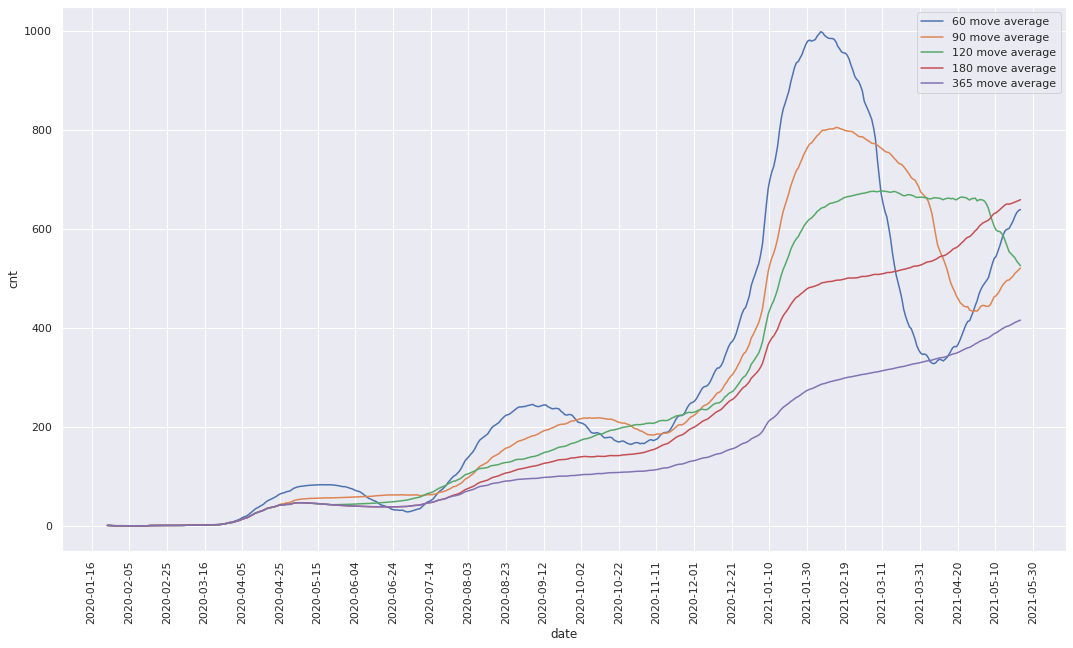

In [55]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y11, label='60 move average')
ax.plot(x, y12, label='90 move average')
ax.plot(x, y13, label='120 move average')
ax.plot(x, y14, label='180 move average')
ax.plot(x, y15, label='365 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

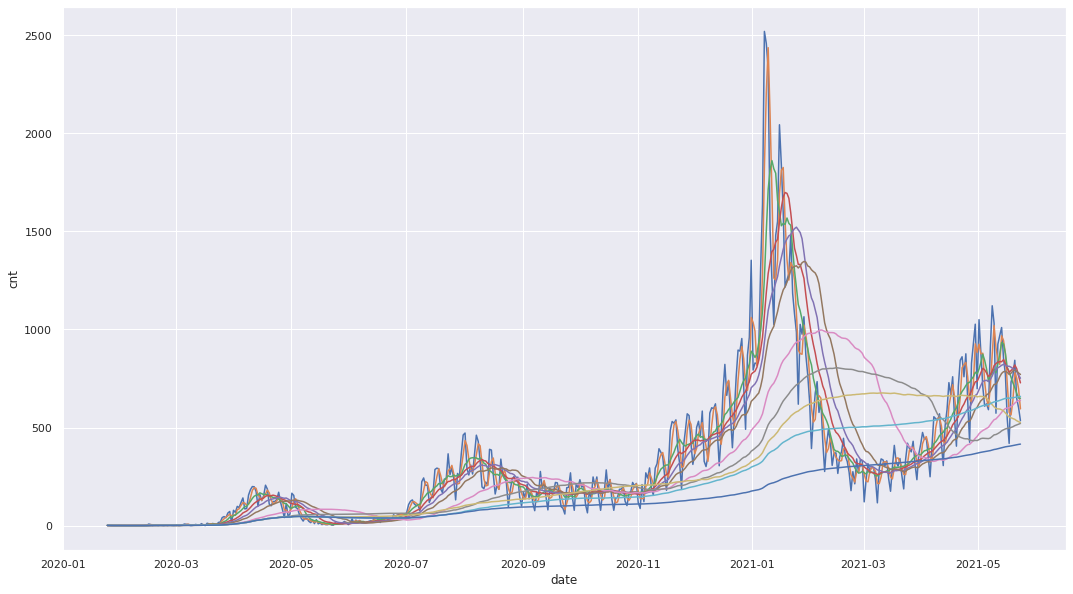

In [56]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18,10))
sns.lineplot(x="date", y="cnt", data=_df)
sns.lineplot(x="date", y="move_ave_3", data=_df)
sns.lineplot(x="date", y="move_ave_7", data=_df)
sns.lineplot(x="date", y="move_ave_14", data=_df)
sns.lineplot(x="date", y="move_ave_21", data=_df)
sns.lineplot(x="date", y="move_ave_30", data=_df)
sns.lineplot(x="date", y="move_ave_60", data=_df)
sns.lineplot(x="date", y="move_ave_90", data=_df)
sns.lineplot(x="date", y="move_ave_120", data=_df)
sns.lineplot(x="date", y="move_ave_180", data=_df)
sns.lineplot(x="date", y="move_ave_365", data=_df)